<a href="https://colab.research.google.com/github/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/curso_exposoma_modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al concepto del Exposoma y sus metodologías. Sesión 4 - "Estrategias para el análisis de datos de Exposoma."**  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/isglobal.png?raw=1" alt="ISGlobal logo" width="300"/>  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>

**Alan Domínguez**, Investigador Predoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  
**Augusto Anguita-Ruiz**, Investigador Postdoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  

El exposoma, descrito como "la totalidad de las exposiciones ambientales humanas desde la concepción en adelante", reconoce que los individuos estamos expuestos simultaneamente a multiples factores ambientales diferentes adoptando un efoque holístico para el descubrimento de factores etiológicos de la enfermedad. La ventaja prinicipal del enfoque del exposoma sobre otros más tradicionales "una exposición, una enfermedad o desenlace de salud" es que proporciona un framework para el estudio de múltiples riesgos ambientales (urbanos, químicos, estilo de vida, sociales, etc...) y sus efectos combinados.

El **objetivo** de esta sesión es ofrecer una **introducción a los distintos abordajes estadísticos** necesarios para responder a las principales cuestiones de **investigación en exposoma**, por lo que esta sesión se :

**1.- Análisis descriptivo:**  En una primera parte de la sesión se trabajará sobre el concepto de análisis descriptivo en exposómica, mediante el cual se extraen las primeras conclusiones sobre los datos. Entre otros objetivos, el análisis descriptivo persigue identificar posibles valores anómalos, factores de confusión o variables que requieran de transformaciones previas al análisis. A su vez, el análisis descriptivo permite comparar preliminarmente los grupos experimentales objeto de estudio, estudiar los patrones de correlación existentes entre factores de exposición, e identificar fenómenos de agrupación en los datos (tanto a nivel de individuos como de características). Todos ellos, pasos imprescindibles para elegir el abordaje estadístico posterior más adecuado.

Alguno de los contenidos que revisaremos en esta sección:
* **Visualización de la distribución y concentración de variables del exposoma.**
* **Correlación entre exposiciones**
* **Análsis de Componentes Principales (PCA) aplicado a variables del exposoma.**

**2.- Análisis de asociación:** El análisis de asociación persigue la identificación de los posibles factores de exposición ambiental asociados con distintos parámetros de salud. En este bloque de la sesión se presentarán por lo tanto distintos abordajes analíticos holísticos centrados en el estudio de los efectos de múltiples factores de exposición y sus mezclas sobre la salud. Esto incluye principalmente modelos como el ExWAS (Exposome-Wide Association Analysis), u otros para el estudio de interacciones, o fenómenos de no linealidad (e.g., Bayesian Kernel Machine Regression). También se presentará una introducción a los métodos de clustering o mezclas de exposición (e.g., Weighted Quantile Sum Regression). Durante su estudio, se introducirán conceptos de gran importancia en el análisis del exposoma como son la selección de características o la corrección de testeo múltiple.

Alguno de los contenidos que revisaremos en esta sección:
* **Exposure Wide Association Analysis (ExWas)**
* **Métodos para la selecciónde variables (Stepwise, Elastic net, DSA)**
* **Weighted quantile sum regression**
* **Clustering**
* **Bayesian Kernel Machine Regression**


# **Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de *Jupyter* (Python) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. *Muy importante*: **el orden las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error, así que se deberá comenzar desde el principio en caso de duda.

Antes de nada:

Es **muy muy importante** que al comienzo se seleccione **"*Abrir en modo de ensayo*" (draft mode)**, arriba a la izquierda. En caso contrario, no permitirá ejecutar ningún bloque de código, por cuestiones de seguridad. Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: "*Advertencia: Este cuaderno no lo ha creado Google.*". No se preocupe, deberá confiar en el contenido del cuaderno (*NoteBook*) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas de código que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.

## **ÍNDICE**
1. [Instalación del entorno R y sus bibliotecas para el análisis de exposoma](#instalacion-librerias)    
2. [Cargar los datos](#cargar-datos)
4. [Análisis descriptivo del Exposoma](#descriptivo)   
5. [Análisis de asociación del Exposoma](#asociacion)
6. [ExWAS...](#etiquetaE)  
7. [Mixtures....](#etiquetaF)   
8. [Bibliografía](#etiquetaG)

## **1. Instalación del entorno R y librerias para el análisis del exposoma** <a name="instalacion-librerias"></a>

A continuación, instalamos/cargamos las librerias necesarias para esta sesión. En el contexto de análisis de exposoma, las bibliotecas de R nos ofrecen una manera mucho más cómoda de procesar, manipular y analizar los datos. Algunas de estas bibliotecas: `tidyverse`, `skimr`, `rexposome`, `bkmr`,  `gWQS`.   
  
La instalación de R en nuestro entorno de Google Colab se realizará en el siguiente bloque de código. Hay que recordar que todas las instalaciones de bibliotecas que realicemos en el entorno de Google Colab solo permanecerán activas unas pocas horas, después de las cuales las bibliotecas instaladas se eliminan. Por lo tanto, será necesario que vuelvas a ejecutar los códigos de instalación de bibliotecas de esta sección cuando necesites ejecutar de nuevo notebook pasado este tiempo.

**Nota:** Recomendamos instalar las librerias **30 minutos** antes del comienzo de la sesión❗❗❗


In [ ]:
# primero chequeamos la version de R que tenemos
#R.Version()

* **Instalar/cargar librerias para la sesión**

Instalaremos/cargaremos las librerias necesarias para la sesión práctica, para esto utilizaremos el paquete `pacman`, este paquete es una herramienta de administración que combina funcionalidades de las funciones `install.packages` + `library`.








In [1]:
install.packages("pacman") # nos permite instalar/cargar paquetes de manera simultanea

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Instalaremos `BiocManager` y `rexposome` (estos dos paquetes son fundamentales para el análsis del exposoma), utilizando el siguiente código ya que algunas veces suele tener problemas de compatibilidad con la versión de R (el proceso tarda alrededor de 15 minutos, por lo que se recomienda instalarla durante la sesión teórica.

In [ ]:
if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c('Biobase', 'mice', 'MultiDataSet', 'lsr', 'FactoMineR',
	'stringr', 'circlize', 'corrplot', 'ggplot2', 'reshape2', 'pryr',
	'scales', 'imputeLCMD', 'scatterplot3d', 'glmnet', 'gridExtra',
	'grid', 'Hmisc', 'gplots', 'gtools', 'S4Vectors'
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

In [3]:
# instalamos rexposome (la instalación de rexposome tarda un poco dependiendo de nuestra conexón)
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xtable’, ‘sourcetools’, ‘shiny’, ‘downlit’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





utf8    (1.2.3 -> 1.2.4) [CRAN]
bit     (4.0.4 -> 4.0.5) [CRAN]
isoband (0.2.6 -> 0.2.7) [CRAN]
highr   (0.9   -> 0.10 ) [CRAN]


Installing 4 packages: utf8, bit, isoband, highr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpwmhCyA/remotesb1d9edcc4/isglobal-brge-rexposome-0bb431c/DESCRIPTION’ ... OK
* preparing ‘rexposome’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rexposome_1.21.1.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rexposome/vignettes/rsconnect/documents/exposome_data_analysis.Rmd/rpubs.com/rpubs/Publish Document.dcf’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#para aquellos que tienen una version antigua de R (en el caso de usar Rstudio desktop)
#devtools::install_github("isglobal-brge/rexposome", ref="R-3.0")

In [ ]:
# Añadimos todas las librerias que necesitemos utilizar (si el paquete ya esta instalado, automaticamente cargara el paquete si esta en la funcion pacman::p_load())
pacman::p_load(tidyverse, corrplot, RColorBrewer, skimr, bkmr, gWQS, ggridges, rexposome)

In [ ]:
#if (!require("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("rexposome", force = TRUE)


## **2. Cargar los datos** <a name="cargar-datos"></a>

A continuación, se muestran las **líneas de código** necesarias para **cargar** en el entorno de R el conjunto de datos de Exposoma. Para esta sesión práctica utilizaremos datos del estudio de exposoma HELIX. El estudio HELIX es un projecto colaborativo entre seis estudios longitudinales de cohortes de nacimiento basados en la población de seis paises Europeos (Francia, Grecia, Lituania, Noruega, Españana y Reino Unido).

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="500"/>

**Nota:** Los datos proporcionados en este curso introductorio fueron simulados a partir de los datos de la subcohorte HELIX. Detalles del projecto HELIX y el origen de los datos colectados pueden ser consultados en la siguiente publicación: https://bmjopen.bmj.com/content/8/9/e021311 y website: https://www.projecthelix.eu/es.

* Los **datos de exposoma (n = 1301)** que utilizaremos estan contenidos en un archivo Rdata, el archivo contiene los siguientes ficheros:

1. `phenotype` (outcomes)
2. `exposome` (exposiciones)
3. `covariates` (covariables)


La base de datos `exposome` contiene más de **200 exposiciones**.

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposures_helix.png?raw=1" alt="HELIX exposures" width="300"/>

La descripción de cada variable (nombre, estructura, tipo de variable, transformacion, ...) esta detallada en el [codebook](https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/data/codebook.csv).




**1.-** Cargamos los datos necesarios para la sesión

In [ ]:
# Opción 1 (cargamos las bases de datos como archivos csv)
phenotype <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/phenotype.csv"),  header = TRUE) # outcomes
exposome <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.csv"), header = TRUE) # exposiciones
covariates <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/covariates.csv"), header = TRUE) # covariables
codebook <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/codebook.csv")) # codebook

In [67]:
# Opción 2 (cargamos un archivo RData, este archivo contiene los 3 dataset + el codebook)
load(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.RData")) #con esta línea cargamos todo

In [ ]:
phenotype
exposome
covariates
codebook

**2.-** Revisamos la estructura y dimensión de los datos

In [ ]:
dplyr::glimpse(phenotype) # 1301 observaciones

In [ ]:
dplyr::glimpse(exposome) # 1301 observaciones

In [ ]:
dplyr::glimpse(covariates) # 1301 observaciones

In [ ]:
dplyr::glimpse(codebook) # este archivo contiene el codebook con la descripción de cada variable

* Si cargamos los archivos csv tenemos que hacer un paso adicional

In [ ]:
#rownames(codebook) <- codebook[, 2]
#codebook <- codebook[, -1]

In [ ]:
dplyr::glimpse(codebook)

**3.-** Hacemos un resumen rápido de nuestros datos, para revisar si estos se cargaron correctamente.

In [ ]:
skimr::skim(phenotype)

In [ ]:
skimr::skim(exposome)

In [ ]:
skimr::skim(covariates)

*   Vamos a utilizar la función `rexposome::loadExposome` para crear un solo dataset (`ExposomeSet`) a traves de los `data.frames` que cargamos inicialmente. Primero ordenaremos los datos en el formato adecuado para nuestro análisis.




In [ ]:
levels(codebook$family)

In [ ]:
# Hacemos un subset de las variables para fines ilustrativos (puedes probar con otras familias)
#xpo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                 #codebook$family == "Metals" |
                                                 #codebook$family == "Chemicals" |
                                                 #codebook$family == "Air Pollution" |
                                                 #codebook$family == "Indoor air" |
                                                 #codebook$family == "Built environment") &
                                                 #codebook$period == "Postnatal"])
expo.list

In [ ]:
# podemos probar con otro subset
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

In [69]:
# podemos excluir algunas variables de exposición en las que no tenemos interes
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [70]:
# seleccionamos columnas(variables) específicas provenientes de las familias que seleccionamos en el paso anterior y añadimos la variable ID
expo2 <- exposome[ ,c("ID", expo.list)]

In [ ]:
# revisamos las variables seleccionadas
dplyr::glimpse(expo2)

In [ ]:
# listado de variables de exposición
codebook[expo.list,]$labels

* Combinamos datos de los ficheros `phenotype` y `covariates`

In [71]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # seleccionamos la 4 columna del dataframe phenotype y la llamamos hs_zbmi_who
             covariates[ ,2:13])  # seleccionamos de las columnas 2 a la 13 del dataframe covariates

# luego combinamos
data <- data.frame(expo2, dat)

In [ ]:
# revisamos la base de datos generadas
dplyr::glimpse(codebook)

In [ ]:
str(data)

Ahora crearemos nuestro objecto `ExposomeSet` combinando nuestros tres archivos que trabajamos en las líneas anteriores. Este dataset esta compuesto por:

* **3 familias de exposiciones** (built environment, metals, orgaanochlorines), son **32 exposiciones en total**. [variables continuas]
* **1 outcome** (z-score for BMI) [variable continua]
* **1 ventana de exposición** [perido postnatal]



In [72]:
exp <- rexposome::loadExposome(
  exposures = expo2[expo.list],
  description = codebook[expo.list,],
  phenotype = dat,
  description.famCol = "family"
  )

In [ ]:
dplyr::glimpse(exp)

Tambien podemos unir nuestras bases de datos usando la función `dplyr::inner_join`, este objecto llamado `exp_all` sera un `data.frame` y no un objecto `ExposomeSet` por lo que no podremos utilizar todas las funcionalidades del paquete `rexposome`

In [24]:
# con esta línea podemos unir todas las bases de datos utilizando ID como la key variable
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [ ]:
dplyr::glimpse(exp_all) # 1,301 observaciones y 242 variables

## **3.- Análisis descriptivo del Exposoma** <a name="descriptivo"></a>

Para el análsis descriptivo del exposoma vamos a utilizar la libreria `rexposome`. Esta libreria contiene diferentes funciones diseñadas para explorar y describir datos de exposoma (missing data, distribución, correlación). Algunas de sus funciones son: `normalityTest` ,`plotMissing`, `plotHistogram`, `plotFamily`, `correlation`, `plotCorrelation`.

In [ ]:
# revisamos la base de datos que utilizaremos (es necesario que sea un ExposomeSet object)
str(exp)

Utilizaremos la función `rexposome::normaltyTest` para evaluar las variables del exposoma que siguen una distribción normal.

In [ ]:
nm <- rexposome::normalityTest(exp)
table(nm$normality)

In [ ]:
# revisamos todas las variables que no tienen una distribución normal
nm$exposure[!nm$normality]

### **3.1.- Visualización de la distribución y concentración de variables del Exposoma**

In [ ]:
str(exp)

* **Histogramas**  

Utilizando la función `plotHistogram` revisamos la distribución de las variables categoricas y continuas de nuestra base de datos. En los histogramas podemos ver una exposción de cada familia



In [ ]:
rexposome::plotHistogram(exp, select = "hs_pb_c_Log2") + ggtitle("Distribución exposición a Plomo")  # Histograma pb
rexposome::plotHistogram(exp, select = "hs_pcb180_cadj_Log2") + ggtitle("Distribución exposición a Bifenilos Policlorados (PCB's)") # Histograma pcb180
rexposome::plotHistogram(exp, select = "hs_popdens_h_Sqrt") + ggtitle("Distribución Densidad poblacional") # Histograma densidad poblacional

* **Boxplots**

Utilizando la función `plotFamily` podemos describir una exposición por familia y estratificar por grupo. A continuación vamos a ver algunos ejemplos (pueden probar con otras familias

In [ ]:
# Contaminantes Organoclorados estratificado por Sexo
rexposome::plotFamily(exp, family = "Organochlorines", group = "e3_sex_None") +
   xlab('Contaminante') +
   ylab('Concentracion')

In [ ]:
# Contaminantes Organoclorados** estratificado por Cohorte
rexposome::plotFamily(exp, family = "Organochlorines", group = "h_cohort") +
                      xlab('Contaminante') +
                      ylab('Concentracion')

In [ ]:
# Contaminación del aire interior estratificado por Cohorte
#rexposome::plotFamily(exp, family = "Indoor air", group = "h_cohort")

In [ ]:
# Metales estratificados por Cohorte
rexposome::plotFamily(exp, family = "Metals", group = "h_cohort")

### **3.2.- Correlación entre exposiciones**

La correlación entre variables es algo importante a tener en consideración cuando queremos hacer análisis en exposoma. Para mirar la correlación intrafamiliar e interfamiliar de las diferentes exposicioens, utilizaremos la funcion `rexposome::correlation`.

In [42]:
exp_cor <- rexposome::correlation(exp, use = "pairwise.complete.obs", method.cor = "spearman") # podemos usar pearson como método de correlación

In [ ]:
extract(exp_cor)[1:4, 1:4]

Podemos visualizar la correlación de todas las exposiciones del exposoma (de nuestro set de datos) utilizando dos tipos de gráficos con la función `rexposome::plotCorrelation`. Cambiando el argumento por `circos` o `matrix` obtenemos un gráfico diferente.

In [ ]:
rexposome::plotCorrelation(exp_cor, type = "circos")

In [ ]:
rexposome::plotCorrelation(exp_cor, type = "matrix",  )

### **3.3.- Análisis de Componentes Principales (PCA)**

El PCA es un algoritmo de machine learning no supervisado utilizado para análisis exploratorios y de reducción de dimensiones. Para aplicar este análisis es necesario que las exposiciones sean estandarizadas, para esto el paquete `rexposome` cuenta con la función `rexposome::standardize` que prepara nuestros datos para aplicar posteriormente el PCA utilizando la funcion `rexposome::pca`. Luego de aplicar el PCA podemos visualzar nuestro análisis utilizando la función `rexposome::plotPCA`

In [ ]:
dplyr::glimpse(exp)

In [ ]:
# Estandraizamos las variables de exposición de nuestro objeto exp
exp_std <- rexposome::standardize(exp, method = "normal")
exp_std

In [ ]:
# Aplicamos el PCA a nuestro nuevo objeto estandarizado exp_std
exp_pca <- rexposome::pca(exp_std)
exp_pca

In [ ]:
# Visualizamos los resultados del PCA
rexposome::plotPCA(exp_pca, set = "all")

***Interpretación PCA***

* **Exposures Space:** Este gráfico representa la variabilidad entre las diferentes exposiciones (es decir, las características o variables de entrada). Cada punto en este espacio corresponde a una caracteristica especifica. La posición de cada punto en las coordenadas PC1 y PC2 indica cuánta varibilidad de esa característica se captura en esas dos componentes principales.

* **Samples Space:** Este gráfico representa la variabilidad entre las diferentes muestras o datos. Cada punto representa una observación, y su posición en las coordenadas PC1 y PC2 indica cuánto de la varibilidad total de esa muestra se describe por esas dos componentes principales.

* **Explained Variance:** Este gráfico de barras muestra el porcentaje de varianza total del conjunto de datos que es explicado por cada componente principal individual. El primer componente (PC1) suele explicar la mayor parte de la variabilidad, seguido por el segundo (PC2), y así sucesivamente. La altura de cada barra indica cuánta varianza explica cada componente.

* **Accum. Explained Variance:** Este gráfico indica cuánta variabilidad total se ha capturado después de sumar cada componente principal sucesivo. Por ejemplo, la varianza explicada por PC1 + PC2 juntos, luego PC1 + PC2 + PC3, y así sucesivamente.

En **resumen** podemos concluir de nuestro análisis **PCA**:

**1.** PC1 explica el 18,76% de la varianza total, mientras que PC2 explica el 13,39%.  
**2.** Las exposiciones (caracteristicas del exposoma) se agrupan en regiones específicas en el espacio de exposiciones, lo que indica que algunas características son similares entre sí.   
**3.** Las muestras en el espacio de muestras se agruopan densamente en torno a un área central, con algunas muestras dispersas, lo que podría indicar posibles grupos o patrones dentro de los datos (clusters).  







In [ ]:
rexposome::plotPCA(exp_pca, set = "samples", phenotype = "h_cohort")

**Interpretación PCA - cohorte**

En el gráfico podemos ver que las observaciones de las diferentes cohortes se superponen en gran medida, pero también hay áreas en las que ciertas observaciones tienden a agruparse más densamente. A pesar de que vemos cierta clusterización o agrupación de observaciones, existe una superposición significativa entre los puntos, lo que podría indicar que las diferencias entre cohortes no son las principales fuentes de variación en este conjunto de datos. Este tipo de gráfico es útil para visualizar cómo se relacionan las muestras entre sí en función de su variabilidad y cómo se distribuyen en función de una categoría de interés, en este caso la variable cohorte.



## **3.- Análisis de asocición del Exposoma** <a name="asociacion"></a>
Una vez exploradas y descritas las variables del exposoma que queremos estudiar, podemos mirar la asosciación entre algún desenlace de salud y las diferentes exposiciones mediante diferentes aproximaciones.


### **3.1.- Exposome-Wide association analysis (ExWAS)**

El método ExWAS es una aproximación que nos permite lidear con high-dimensionality data. Este método testea la asociación de cada una de las exposiciones con el desenlace de salud de interes, ajustando por variables confusoras (pero no por co-exposiciones), adicionalmente nos permite controlar por testeos múltiples. Este método puede ser aplicado a través de la función `rexposome::exwas`.

In [ ]:
exwas <- rexposome::exwas(exp, formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None, family = "gaussian")
exwas

In [ ]:
# Obtenemos el threshold para el número efectivo de testeo (multiple testing): corrected p-value
rexposome::tef(exwas)

In [97]:
rexposome::extract(exwas)

In [ ]:
exwas_result <- round(as.data.frame(extract(exwas)),6)
View(exwas_result)

In [ ]:
exwas_result[exwas_result$pvalue<tef(exwas),]

Utilizando la función `rexposome::plotExwas` podemos visualizar los resultados del exwas usando un Manhattan plot. Este tipo de gráfico es particularmente útil ya que nos permite visualizar la asociación estadistica a traves del p-valor agrupado por las diferentes familias de exposición. Es importante mencionar que el Manhattan plot solo nos enseña los p-valores, pero ninguna metrica de el efecto de las exposiones es enseñado.

In [ ]:
clr <- rainbow(length(familyNames(exp)))
names(clr) <- familyNames(exp)

rexposome::plotExwas(exwas, color = clr, show.effective = TRUE,
          exp.order=expo.list) +
  ggtitle("Exposome-Wide Association para BMI")


*   **Pregunta:**




Utilizando la función `rexposome::plotEffect` podemos ver el efecto estimado para un módelo determinado, en este caso el efecto de las exposiciones postnatales de las familias seleccionadas (Built environment, Metals, Organochlorines) en el BMI.

In [ ]:
rexposome::plotEffect(exwas) + ggtitle("Forest plot para la asociación de variables del exposoma y BMI")

Otra forma de visualizar los resultados del ExWAS es mediante un volcano-plot, este tipo de gráfico es más ilustrativo ya que combina las tecnicas de visualización enseñadas anteriormente. Este tipo de gráfico enseña el p-valor y el tamaño del efecto de las diferentes exposiciones con el desenlace de salud estudiado (BMI). El volcano-plot puede ser computado mediante la función `rexposome::volcanoPlot`

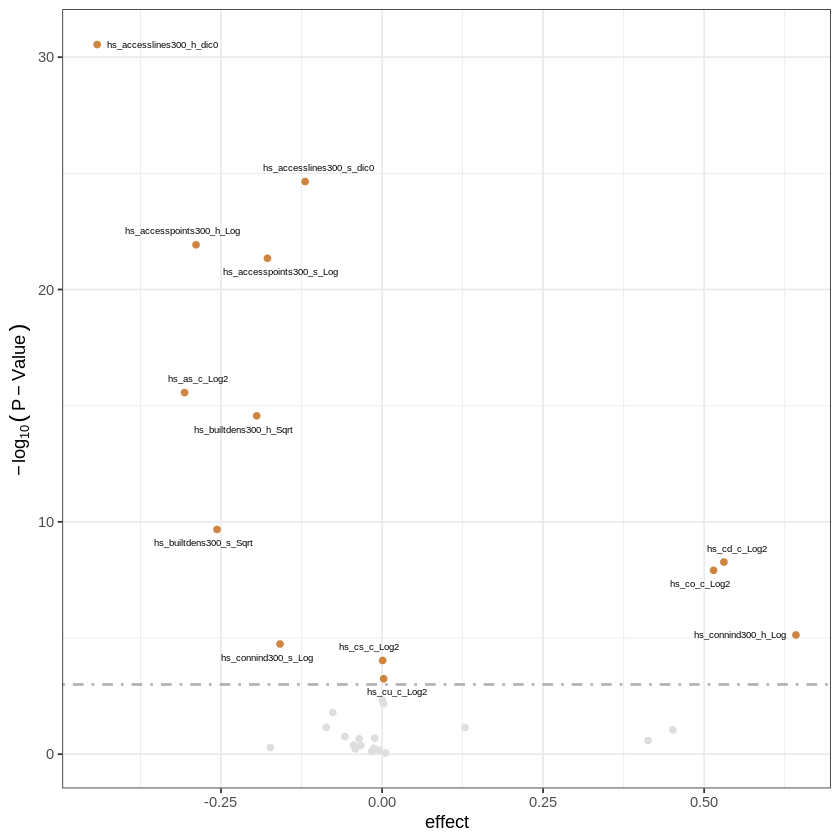

In [112]:
rexposome::plotVolcano(exwas)